In [1]:
#Імпоруємо основні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/serge/Downloads/Car_Prices_Poland_Kaggle.csv/Car_Prices_Poland_Kaggle.csv')
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [3]:
df['mark'].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [4]:
df.describe()

,Unnamed: 0,year,mileage,vol_engine,price
count,117927.000000,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,58963.000000,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,34042.736935,5.690135,9.236936e+04,643.613438,8.482458e+04
min,0.000000,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,29481.500000,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,58963.000000,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,88444.500000,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,117926.000000,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [5]:
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [6]:
df.drop(columns=["generation_name","Unnamed: 0"],inplace=True) #прибераємо зайві стовпці 

In [7]:
df.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [8]:
df.shape

(117927, 9)

In [9]:
BMW = df[df['mark'] =='bmw']

In [10]:
BMW['model'].unique()

array(['3gt', '5gt', 'i3', 'm2', 'm3', 'm4', 'm5', 'm8', 'seria-1',
       'seria-2', 'seria-3', 'seria-4', 'seria-5', 'seria-6', 'seria-7',
       'seria-8', 'x1', 'x2', 'x3', 'x4', 'x5', 'x5-m', 'x6', 'x6-m',
       'x7'], dtype=object)

In [11]:
BMW.shape

(11070, 9)

C:\Users\serge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


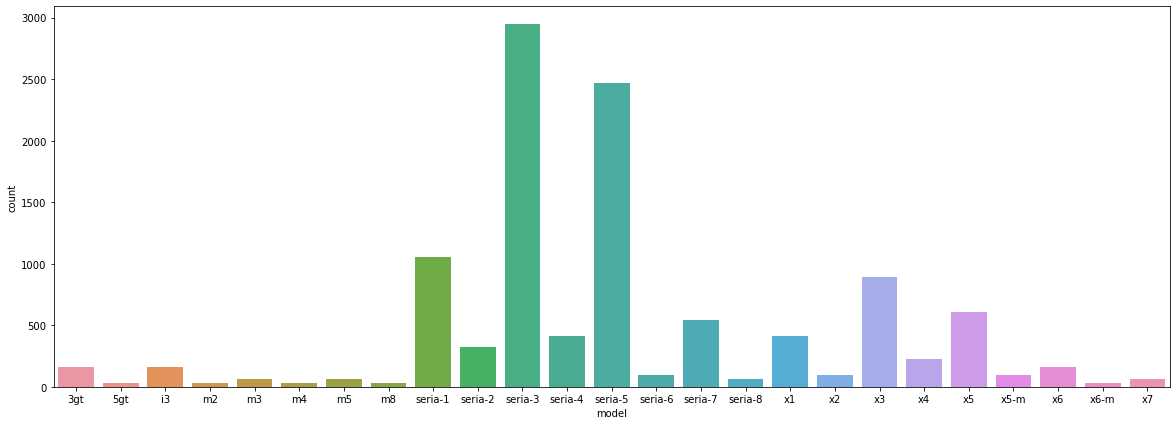

In [12]:
# 10% від основної вибірки, не погано 
plt.figure(figsize=(20,7))
sns.countplot(BMW['model'])
plt.show()

In [13]:
# Як ми можемо бачити 3-ка та 5-ка БМВ найпопулярніші, нічого нового)

<AxesSubplot:xlabel='vol_engine', ylabel='price'>

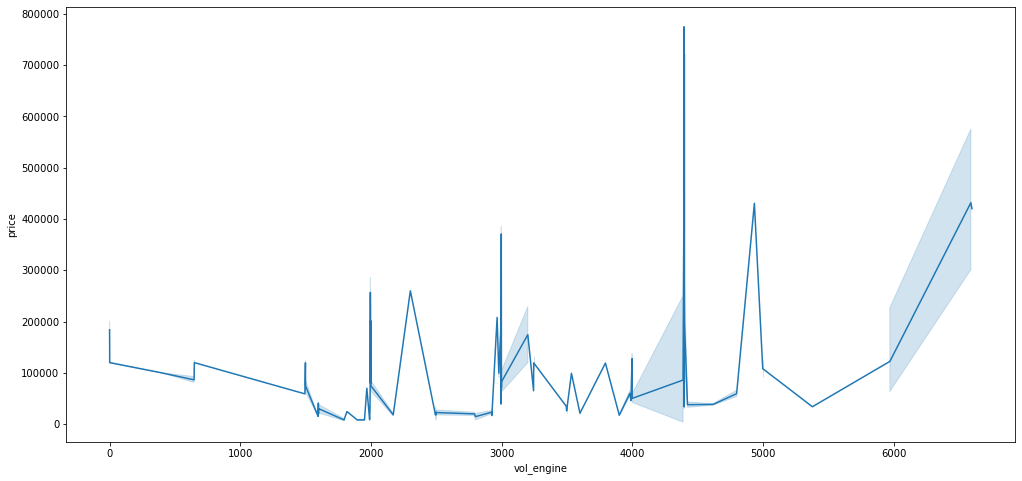

In [14]:
# давайте подивимося, як зміниться ціна при збільшенні об'єму двигуна
plt.figure(figsize=(17,8))
sns.lineplot(data=BMW,x="vol_engine",y="price")

In [15]:
#Як і очікувалось, при збільшенні об'єма двигуна зростає ціна
BMW[(BMW['price'] > 710000) & (BMW['vol_engine'] >= 4000)]

,mark,model,year,mileage,vol_engine,fuel,city,province,price
24440,bmw,m5,2021,14450,4395,Gasoline,Warszawa,Mazowieckie,939900
24441,bmw,m5,2021,5,4395,Gasoline,Warszawa,Mazowieckie,749900
24450,bmw,m5,2021,5,4395,Gasoline,Łódź,Łódzkie,788800
24451,bmw,m5,2021,6,4395,Gasoline,Kielce,Świętokrzyskie,800400
24460,bmw,m5,2021,20,4395,Gasoline,Mikołów,Śląskie,784100
...,...,...,...,...,...,...,...,...,...
34924,bmw,x6-m,2021,20,4395,Gasoline,Mikołów,Śląskie,779300
34935,bmw,x6-m,2021,20,4395,Gasoline,Mikołów,Śląskie,769900
34942,bmw,x6-m,2021,1,4395,Gasoline,Poznań,Wielkopolskie,719000
34946,bmw,x6-m,2022,20,4395,Gasoline,Gdańsk,Pomorskie,1100000


In [16]:
group=BMW.groupby("fuel")["price"].mean()
group.sort_values()

fuel
LPG          21364.800000
Diesel      115000.963880
Gasoline    131591.806803
Electric    140506.013333
Hybrid      279537.100000
Name: price, dtype: float64

In [17]:
# Як ми бачемо машини на гібридних двигунах найбільш дорогі.
BMW[(BMW['fuel'] == 'Hybrid') & (BMW['year'] >= 2021)]

,mark,model,year,mileage,vol_engine,fuel,city,province,price
28461,bmw,seria-3,2021,1,1998,Hybrid,Chorzów,Śląskie,217600
28468,bmw,seria-3,2021,5,1998,Hybrid,Łódź,Łódzkie,266100
28514,bmw,seria-3,2021,0,0,Hybrid,Wrocław,Dolnośląskie,249900
28517,bmw,seria-3,2021,9900,1998,Hybrid,Mikołów,Śląskie,179900
28519,bmw,seria-3,2021,6000,1998,Hybrid,Kraków,Małopolskie,221035
...,...,...,...,...,...,...,...,...,...
34582,bmw,x5,2021,5,2998,Hybrid,Kalisz,Wielkopolskie,438600
34587,bmw,x5,2021,5,2998,Hybrid,Warszawa,Mazowieckie,388500
34588,bmw,x5,2021,10700,2998,Hybrid,Warszawa,Mazowieckie,406900
34595,bmw,x5,2021,5,2998,Hybrid,Długołęka,Dolnośląskie,450000


In [24]:
#Трішки пограємо з машинками
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

In [20]:
LE=LabelEncoder()
LE.fit(BMW["model"])
BMW["Model"]=LE.transform(BMW["model"])

LE2=LabelEncoder()

LE2.fit(BMW["fuel"])
BMW["Fuel"]=LE2.transform(BMW["fuel"])

BMW.drop(columns=["mark","model","fuel","city","province"],axis=1 ,inplace=True )#прибираємо зайві стовпці

BMW.head() 

C:\Users\serge\AppData\Local\Temp/ipykernel_7744/3314146548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMW["Model"]=LE.transform(BMW["model"])
C:\Users\serge\AppData\Local\Temp/ipykernel_7744/3314146548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMW["Fuel"]=LE2.transform(BMW["fuel"])
C:\Users\serge\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

,year,mileage,vol_engine,price,Model,Fuel
23945,2015,330000,1995,57900,0,0
23946,2017,79665,1995,142000,0,0
23947,2014,79160,1995,91700,0,0
23948,2015,223000,1995,54900,0,0
23949,2018,179000,1995,92700,0,0


In [21]:
X = BMW.drop(columns="price")           
y = BMW["price"]   

# розділемо данні та треін та тест, і зробемо перевірку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (8302, 5)
X Test  :  (2768, 5)
Y Train :  (8302,)
Y Test  :  (2768,)


In [23]:
# ну як без лінійки то?)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=False,copy_X=True, n_jobs=None)

# Вчимо моділь

LinearRegression_model.fit(X_train,y_train)

# Оцінка X і Y - тест і тренування

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

y_pred_LR=LinearRegression_model.predict(X_test)

print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)) 

Score the X-train with Y-train is :  0.6863242399566789
Score the X-test  with Y-test  is :  0.6774383209200581
 Model Evaluation Linear R : mean absolute error is  52285.904861829054
 Model Evaluation Linear R : mean squared  error is  6101924362.625044
 Model Evaluation Linear R : median absolute error is  38319.96725437045
 The Score Linear Regression  0.6774383209200581


In [ ]:
# Величезні помилки..., алє скор не такий поганий))

In [25]:
# Викорастаємо Дерево рішень

DecisionTreeRegressor_model=DecisionTreeRegressor()

# Вчимо моділь

DecisionTreeRegressor_model.fit(X_train,y_train)

# Оцінка X і Y - тест і тренування

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

y_predDTR=DecisionTreeRegressor_model.predict(X_test)

print(" The Score Decision Tree Regressor model " ,r2_score(y_test,y_predDTR))

Score the X-train with Y-train is :  0.9928128728586574
Score the X-test  with Y-test  is :  0.9323220446802427
 The Score Decision Tree Regressor model  0.9323220446802427


In [ ]:
# Схоже шо дерево дало збой та перевчилося, алє 93% доволі круто 

In [26]:
# Викорастаємо  модель К Сусідів

KNeighborsRegressor_model=KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

# Вчимо моділь

KNeighborsRegressor_model.fit(X_train,y_train)

# Оцінка X і Y - тест і тренування

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

y_predKN=KNeighborsRegressor_model.predict(X_test)

print(" The Score K Neighbors Regressor Model " ,r2_score(y_test,y_predKN)) 

Score the X-train with Y-train is :  0.9928128728586574
Score the X-test  with Y-test  is :  0.9323220446802427
 The Score K Neighbors Regressor Model  0.8607256030264684


In [ ]:
#KNN теж перевчилася ( алє всеж таки 93% на рівні з деревом

In [27]:
# Викорастаємо Рандомний ліс

RandomForestRegressor_model=RandomForestRegressor()

# Вчимо моділь

RandomForestRegressor_model.fit(X_train,y_train)

# Оцінка X і Y - тест і тренування

print("Score the X-train with Y-train is : ", RandomForestRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", RandomForestRegressor_model.score(X_test,y_test))

y_predRFR=RandomForestRegressor_model.predict(X_test)

print(" The Score Random Forest Regressor Model " ,r2_score(y_test,y_predRFR)) 

Score the X-train with Y-train is :  0.9867858887263942
Score the X-test  with Y-test  is :  0.9481728190855301
 The Score Random Forest Regressor Model  0.9481728190855301


In [ ]:
# На мій погляд ліс справився краще всього, він і не перевчився та щей дав кращій скор на віході по тесту 94%

In [ ]:
# Всім гарного дня та мирного неба над головою.